# Introduction

For understanding and investigating the caching strategies, I have run experiments with various amounts and types of data. Below I have included the most important ones that gave me the most understanding in a logical order.

# Set Up

In [2]:
from memory import Memory
from cache import CyclicCache, LRUCache
import utilities
import random
import matplotlib.pyplot as plt #I am using matplotlib, an external python library, in order to implement graphing 

## Experiment 1: Random input

In order to have the first understanding of the strategies, randomly generated test data will be used as an input in the first experiment.

In [3]:
#I will use memory of size 10 and the cache will be size of 4 by default
data = utilities.sample_data(size=10)

memory = Memory(data)
lru = LRUCache(data, size=4)
cyc = CyclicCache(data, size=4)        

mem_hits = []
lru_hits = []
cyc_hits = []

test_data = []
x_axis = []

for x in range(100): #hundred test data points for this experiment
    address = random.randint(0,9)#The limit is 9 as that is the maximum possible address values in given memory of size 10
    x_axis.append(x)
    test_data.append(address)
    
for address in test_data:
    memory.lookup(address)
    mem_hits.append(memory.get_memory_hit_count())
for address in test_data:
    lru.lookup(address)
    lru_hits.append(lru.get_memory_hit_count())
for address in test_data:
    cyc.lookup(address)
    cyc_hits.append(cyc.get_memory_hit_count())

The memory hit count has been generated for 100 random values in the specified interval. A graph may help us to visualize what is happening in terms of the memory hit counts for each strategy. As already mentioned above, I will use matplot library to plot graphs.

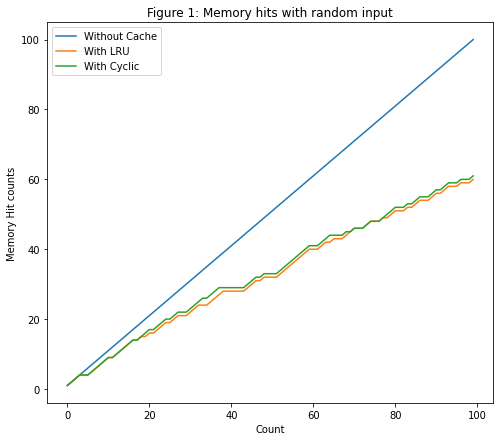

In [4]:
plt.figure(figsize=(8, 7))
plt.plot(x_axis, mem_hits, label = "Without Cache")
plt.plot(x_axis, lru_hits, label = "With LRU")
plt.plot(x_axis, cyc_hits, label = "With Cyclic")
plt.legend()

plt.title("Figure 1: Memory hits with random input")
plt.xlabel("Count")
plt.ylabel("Memory Hit counts")

plt.show()

The above clearly demonstrates that caching is way better than no caching with memory access. However, it does not provide a clear view on the differences between LRU and Cycling caching as their values are too close together and sometimes even overlap. This suggests that in order to get a better look at their differences the input data should not be randomized.

Even without taking the graph into account, the input data should never be randomized as the idea of caching is to ease a 'realistic' usage of memory because there is always a 'logic' or a pattern in the sequence of accessing the memory. I have just used the randomized test in order to further demonstrate that point.

## Experiment 2: Patterned input

To observe the real advantage of LRU(Least Recently Used) caching, I have decided to generate patterned test data. My idea is to repeat the same memory access pattern but with random access points in between the repetitions. 

This kind of data will be more realistic as in our daily lives, we, as humans, have our usual applications or files that we access the most and very frequently during the day, meaning they never leave our cache. Additionally, the same repeating pattern will let me to fully demonstrate the capability of LRU caching. 

Another important note is that the number of of addresses the repeating pattern consists added the number of random separators should be equal to the cache size provided. This idea I have derived just basically understanding the working of the LRU. If the total number is bigger than the cache will forget all the used values and the usage of the pattern will be unhelpful.



Firstly, I have created the data generation function so that I will get my desired test data quicker. Also the function allows me to alternate the data genration with ease every time.

The first argument of the function is the interval from which the numbers can be generated. Logically, it depends on the size of the memory. The second argument let's me choose how many data points I would like to generate. The third argument passes the cache size used and the last argument controls how many number should the repeating pattern contain.

In [5]:
def generate_data_for_LRU(interval, limit, cache_size, repeat_amount):
    some_data = []#array to return test data
    repeat_values = random.sample(range(interval), repeat_amount)#the repeat values in the repeat interval
    
    for z in range(limit):
        for d in repeat_values:
            some_data.append(d)
        for x in range(cache_size-repeat_amount):    
            not_in_repeat = random.choice([y for y in range(interval) if y not in repeat_values])#the separators
            some_data.append(not_in_repeat)
    return some_data
                
    

In [6]:
#I have also created a testing function to have cleaner and non-redundant code
def test_the_memories(array_data, m_hits, l_hits, c_hits): #to test each memory 
    for address in array_data:
        memory.lookup(address)
        
    m_hits.append(memory.get_memory_hit_count())
    
    for address in array_data:
        lru.lookup(address)
        
    l_hits.append(lru.get_memory_hit_count())
    
    for address in array_data:
        cyc.lookup(address)
        
    c_hits.append(cyc.get_memory_hit_count())

My first test has memory of size 100 and cache of size 40.

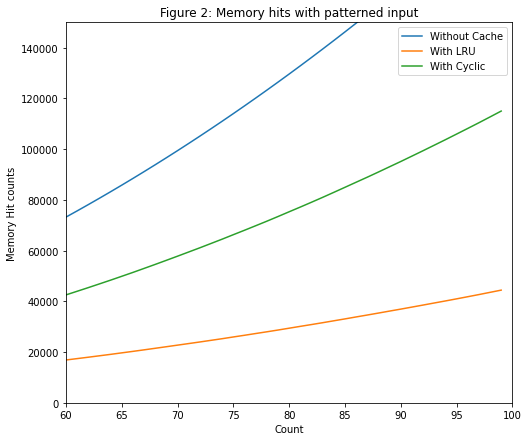

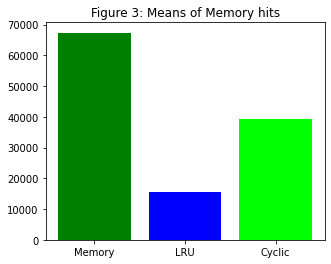

Mean LRU hits: 15438
Mean Cyclic hits: 39124


In [15]:
data = utilities.sample_data(size=100)

memory = Memory(data)
lru = LRUCache(data, size=40)
cyc = CyclicCache(data, size=40)        

mem_hits = []
lru_hits = []
cyc_hits = []
x_axis = []

for a in range(1,100):
    x_axis.append(a)
    test_data = generate_data_for_LRU(100, a, lru.cache_size, 30)
    test_the_memories(test_data, mem_hits, lru_hits, cyc_hits)
#print(test_data) uncomment to see test data
# print('MEM')
# print(mem_hits)
# print('LRU')
# print(lru_hits)
# print('CYC')
# print(cyc_hits)
plt.figure(figsize=(8, 7))
plt.plot(x_axis, mem_hits, label = "Without Cache")
plt.plot(x_axis, lru_hits, label = "With LRU")
plt.plot(x_axis, cyc_hits, label = "With Cyclic")

plt.ylim(0, 150000)
plt.xlim(60, 100)
plt.legend()

plt.title("Figure 2: Memory hits with patterned input")
plt.xlabel("Count")
plt.ylabel("Memory Hit counts")

plt.show()
#Finding means for each
sum = 0
for x in mem_hits:
    sum += x
mean_mem = int(sum/len(mem_hits))
sum = 0
for x in lru_hits:
    sum += x
mean_lru = int(sum/len(lru_hits))
sum = 0
for x in cyc_hits:
    sum += x
mean_cyc = int(sum/len(cyc_hits))
means = []
bar_names = ['Memory', 'LRU', 'Cyclic']
means.append(mean_mem)
means.append(mean_lru)
means.append(mean_cyc)

plt.figure(figsize=(5, 4))
plt.bar(bar_names, means, color=['green', 'blue', 'lime'])
plt.title("Figure 3: Means of Memory hits")
plt.show()

print('Mean LRU hits:', mean_lru)
print('Mean Cyclic hits:', mean_cyc)



In the Figure 2 graph, it can be clearly seen that the LRU caching is outperforming the Cyclic caching by more than twice.

I have tried the same method with changing value of memory size and cache size. I have also altered the pattern repeating value. 

I have done a lot of various tests but due to their amount I cannot include all of them. The main thing that I have observed is that the sizes do not matter separately: what matters is their ratios. For example, the ratio of cache size and the memory size or the ratio of the amount of repeating values and cache size. 

In below example, I demonstrate that even with one repeating value with cache size 80 and memory size 1000, LRU caching outperforms Cyclic. 

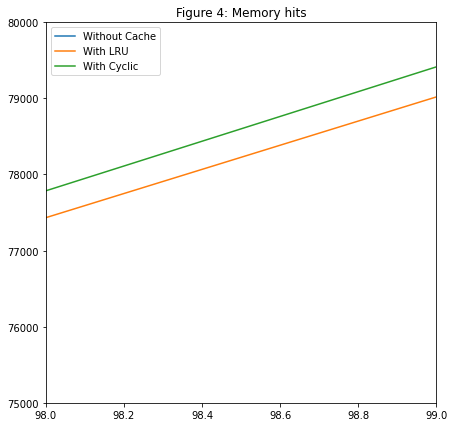

In [444]:
data = utilities.sample_data(size=1000)

memory = Memory(data)
lru = LRUCache(data, size=80)
cyc = CyclicCache(data, size=80)        

mem_hits = []
lru_hits = []
cyc_hits = []
x_axis = []

for a in range(1,100):
    x_axis.append(a)
    test_data = generate_data_for_LRU(100, a, lru.cache_size, 1)
    test_the_memories(test_data, mem_hits, lru_hits, cyc_hits)

# print('MEM')
# print(mem_hits)
# print('LRU')
# print(lru_hits)
# print('CYC')
# print(cyc_hits)

plt.figure(figsize=(7, 7))
plt.plot(x_axis, mem_hits, label = "Without Cache")
plt.plot(x_axis, lru_hits, label = "With LRU")
plt.plot(x_axis, cyc_hits, label = "With Cyclic")
plt.title("Figure 4: Memory hits")
plt.legend()
plt.ylim(75000, 80000)
plt.xlim(98, 99)
plt.show()



Another interesting idea that I have found out after huge amount of testing is that having different cache sizes for each caching strategy can affect the memory hits. 

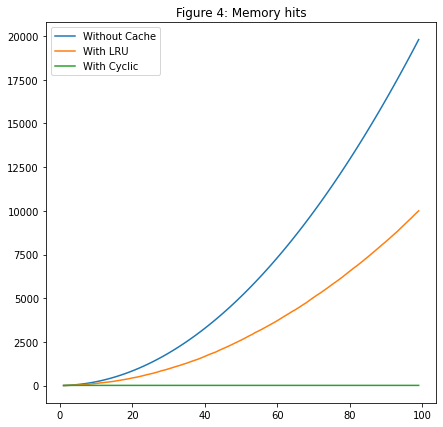

In [445]:
data = utilities.sample_data(size=100)

memory = Memory(data)
lru = LRUCache(data, size=4)
cyc = CyclicCache(data, size=12)        

mem_hits = []
lru_hits = []
cyc_hits = []
x_axis = []

for a in range(1,100):
    x_axis.append(a)
    test_data = generate_data_for_LRU(10, a, lru.cache_size, 1)
    test_the_memories(test_data, mem_hits, lru_hits, cyc_hits)

# print('MEM')
# print(mem_hits)
# print('LRU')
# print(lru_hits)
# print('CYC')
# print(cyc_hits)

plt.figure(figsize=(7, 7))
plt.plot(x_axis, mem_hits, label = "Without Cache")
plt.plot(x_axis, lru_hits, label = "With LRU")
plt.plot(x_axis, cyc_hits, label = "With Cyclic")
plt.title("Figure 4: Memory hits")
plt.legend()
# plt.ylim(75000, 80000)
# plt.xlim(98, 99)
plt.show()




In the above example I have used different cache sizes for LRU and Cyclic. And as I was predicting, if the the size of Cyclic cache is bigger than the size for LRU, Cyclic cache outperforms. Furthermore, I have found that the bigger the difference between there sizes, the bigger the gap of efficiency, which was expected. 

I have also altered the amount of the repeating pattern. The closest LRU caching can get to Cyclic is when the repeating pattern size is exactly the size of LRU cache.

# Conclusion

Taking into account, all the above experiments, alongside my understanding of caching strategies, I came to a conclusion that LRU caching outperforms Cyclic caching in more or less realistic scenarios of memory usage. 